# (2) 2.1: Unsupervised Learning Algorithms

In [2]:
import os
import operator

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [3]:
# This option ensures the charts you create are displayed in the notebook without needing to "call" them specifically.
%matplotlib inline

# Turning off warning feature
import warnings
warnings.filterwarnings('ignore')

# Suppress scientific notation for easier analysis profiling
pd.set_option('display.float_format', '{:.2f}'.format)


In [4]:
path = r'C:\Users\nvak6\Machine Learning with Python'
#Read in the Pleasant weather data.
pleasant = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
pleasant

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
prediction = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'))
prediction

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.10,0.85,1.02,0.32,0.09,0,0.70,...,5,0.88,1.00,0.45,0.34,0,4.70,8.50,6.00,10.90
1,19600102,1,6,2.10,0.84,1.02,0.36,1.05,0,1.10,...,7,0.91,1.00,0.25,0.84,0,0.70,8.90,5.60,12.10
2,19600103,1,8,2.10,0.90,1.02,0.18,0.30,0,0.00,...,7,0.91,1.01,0.17,0.08,0,0.10,10.50,8.10,12.90
3,19600104,1,3,2.10,0.92,1.02,0.58,0.00,0,4.10,...,7,0.86,1.02,0.13,0.98,0,0.00,7.40,7.30,10.60
4,19600105,1,6,2.10,0.95,1.02,0.65,0.14,0,5.40,...,3,0.80,1.03,0.46,0.00,0,5.70,5.70,3.00,8.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.10,0.79,1.02,1.34,0.22,0,7.70,...,5,0.82,1.01,1.13,0.41,0,3.40,10.70,7.90,13.50
22946,20221028,10,6,2.10,0.77,1.02,1.34,0.22,0,5.40,...,5,0.82,1.01,1.13,0.41,0,3.40,10.70,7.90,13.50
22947,20221029,10,4,2.10,0.76,1.02,1.34,0.22,0,6.10,...,5,0.82,1.01,1.13,0.41,0,3.40,10.70,7.90,13.50
22948,20221030,10,5,2.10,0.80,1.02,1.34,0.22,0,5.80,...,5,0.82,1.01,1.13,0.41,0,3.40,10.70,7.90,13.50


In [6]:
file = 'Dataset-weather-prediction-dataset-processed.csv'

# Separate DATE and MONTH columns
date_month = prediction[['DATE', 'MONTH']]

# Select all other columns for scaling
cols_to_scale = prediction.drop(columns=['DATE', 'MONTH'])

# Apply StandardScaler
scaler = StandardScaler()
scaled_values = scaler.fit_transform(cols_to_scale)

# Create scaled DataFrame
scaled_df = pd.DataFrame(scaled_values, columns=cols_to_scale.columns)

# Combine DATE, MONTH, and scaled data
final_df = pd.concat([date_month.reset_index(drop=True), scaled_df], axis=1)

# Save the result
final_df.to_csv(os.path.join(path, 'weather_data_scaled.csv'), index=False)

In [7]:
#Read in the European weather data.
scaled = pd.read_csv(os.path.join(path, 'weather_data_scaled.csv'))
scaled

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,0.66,-0.03,0.83,-0.00,-1.10,-0.27,-0.18,-0.90,...,-0.44,0.76,-1.30,-0.81,-0.09,-0.02,0.37,-0.67,-0.52,-0.75
1,19600102,1,0.24,-0.03,0.74,-0.00,-1.06,1.66,-0.18,-0.81,...,0.78,1.18,-1.26,-1.04,0.50,-0.02,-0.83,-0.55,-0.63,-0.41
2,19600103,1,1.08,-0.03,1.28,-0.00,-1.25,0.16,-0.18,-1.07,...,0.78,1.18,-0.43,-1.14,-0.40,-0.02,-1.01,-0.07,0.05,-0.18
3,19600104,1,-1.00,-0.03,1.46,-0.00,-0.82,-0.45,-0.18,-0.11,...,0.78,0.48,0.39,-1.18,0.67,-0.02,-1.04,-1.00,-0.16,-0.84
4,19600105,1,0.24,-0.03,1.73,-0.00,-0.75,-0.16,-0.18,0.19,...,-1.67,-0.36,1.73,-0.79,-0.49,-0.02,0.67,-1.51,-1.34,-1.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,-1.83,-0.03,0.28,1.04,-0.01,-0.00,-0.18,0.72,...,-0.44,-0.08,-0.00,-0.01,-0.01,-0.02,-0.02,-0.01,-0.00,-0.00
22946,20221028,10,0.24,-0.03,0.10,0.98,-0.01,-0.00,-0.18,0.19,...,-0.44,-0.08,-0.00,-0.01,-0.01,-0.02,-0.02,-0.01,-0.00,-0.00
22947,20221029,10,-0.59,-0.03,0.01,0.72,-0.01,-0.00,-0.18,0.35,...,-0.44,-0.08,-0.00,-0.01,-0.01,-0.02,-0.02,-0.01,-0.00,-0.00
22948,20221030,10,-0.17,-0.03,0.37,0.49,-0.01,-0.00,-0.18,0.28,...,-0.44,-0.08,-0.00,-0.01,-0.01,-0.02,-0.02,-0.01,-0.00,-0.00


In [8]:
# Merge data sets using an inner join
merge = scaled.merge(pleasant, on='DATE', how='inner')
merge

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,1,0.66,-0.03,0.83,-0.00,-1.10,-0.27,-0.18,-0.90,...,0,0,0,0,0,0,0,0,0,0
1,19600102,1,0.24,-0.03,0.74,-0.00,-1.06,1.66,-0.18,-0.81,...,0,0,0,0,0,0,0,0,0,0
2,19600103,1,1.08,-0.03,1.28,-0.00,-1.25,0.16,-0.18,-1.07,...,0,0,0,0,0,0,0,0,0,0
3,19600104,1,-1.00,-0.03,1.46,-0.00,-0.82,-0.45,-0.18,-0.11,...,0,0,0,0,0,0,0,0,0,0
4,19600105,1,0.24,-0.03,1.73,-0.00,-0.75,-0.16,-0.18,0.19,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,-1.83,-0.03,0.28,1.04,-0.01,-0.00,-0.18,0.72,...,0,0,0,0,0,0,0,0,0,0
22946,20221028,10,0.24,-0.03,0.10,0.98,-0.01,-0.00,-0.18,0.19,...,0,0,0,0,0,0,0,0,0,0
22947,20221029,10,-0.59,-0.03,0.01,0.72,-0.01,-0.00,-0.18,0.35,...,0,0,0,0,0,0,0,0,0,0
22948,20221030,10,-0.17,-0.03,0.37,0.49,-0.01,-0.00,-0.18,0.28,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Drop the DATE and MONTH data as those numbers are not scaled with the rest.
drop_features = merge.drop(
    [
        "MONTH",
        # GDANSK features
        "GDANSK_cloud_cover", "GDANSK_humidity",
        "GDANSK_precipitation", "GDANSK_snow_depth",
        "GDANSK_temp_mean", "GDANSK_temp_min", "GDANSK_temp_max",
        # ROMA features
        "ROMA_cloud_cover", "ROMA_humidity", "ROMA_pressure",
        "ROMA_sunshine", "ROMA_temp_mean",
        # TOURS features
        "TOURS_humidity", "TOURS_pressure",
        "TOURS_global_radiation", "TOURS_precipitation",
        "TOURS_temp_mean", "TOURS_temp_min", "TOURS_temp_max"
    ], 
    axis=1
)

drop_features


,DATE,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,...,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0.66,-0.03,0.83,-0.00,-1.10,-0.27,-0.18,-0.90,-0.53,...,0,0,0,0,0,0,0,0,0,0
1,19600102,0.24,-0.03,0.74,-0.00,-1.06,1.66,-0.18,-0.81,-0.58,...,0,0,0,0,0,0,0,0,0,0
2,19600103,1.08,-0.03,1.28,-0.00,-1.25,0.16,-0.18,-1.07,-0.26,...,0,0,0,0,0,0,0,0,0,0
3,19600104,-1.00,-0.03,1.46,-0.00,-0.82,-0.45,-0.18,-0.11,-0.56,...,0,0,0,0,0,0,0,0,0,0
4,19600105,0.24,-0.03,1.73,-0.00,-0.75,-0.16,-0.18,0.19,-1.00,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,-1.83,-0.03,0.28,1.04,-0.01,-0.00,-0.18,0.72,0.75,...,0,0,0,0,0,0,0,0,0,0
22946,20221028,0.24,-0.03,0.10,0.98,-0.01,-0.00,-0.18,0.19,0.86,...,0,0,0,0,0,0,0,0,0,0
22947,20221029,-0.59,-0.03,0.01,0.72,-0.01,-0.00,-0.18,0.35,0.86,...,0,0,0,0,0,0,0,0,0,0
22948,20221030,-0.17,-0.03,0.37,0.49,-0.01,-0.00,-0.18,0.28,0.68,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Convert to DATETIME

# Convert 'DATE' column to string
drop_features["DATE"] = drop_features["DATE"].astype(str)

# Convert string dates to datetime format
drop_features["DATE"] = pd.to_datetime(drop_features["DATE"], format="%Y%m%d")

# Verify the conversion
drop_features["DATE"]


0       1960-01-01
1       1960-01-02
2       1960-01-03
3       1960-01-04
4       1960-01-05
           ...    
22945   2022-10-27
22946   2022-10-28
22947   2022-10-29
22948   2022-10-30
22949   2022-10-31
Name: DATE, Length: 22950, dtype: datetime64[ns]

In [11]:
# Define the start and end dates of the range
start_date = "2012-01-01"
end_date = "2022-10-31"

# Filter data based on the specified range
features = drop_features[(drop_features["DATE"] >= start_date) & (drop_features["DATE"] <= end_date)]

# View new dataframe features
features


,DATE,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,...,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
18993,2012-01-01,1.08,-0.30,0.28,0.11,-1.10,-0.45,-0.18,-1.07,0.14,...,0,0,0,0,0,0,0,0,0,0
18994,2012-01-02,1.08,1.34,1.01,-0.19,-1.25,1.06,-0.18,-1.07,-0.42,...,0,0,0,0,0,0,0,0,0,0
18995,2012-01-03,-0.17,1.34,-0.35,0.92,-0.88,0.96,-0.18,-0.28,-0.43,...,0,0,0,0,0,0,0,0,0,0
18996,2012-01-04,-0.17,4.07,-0.53,0.75,-0.96,-0.27,-0.18,-0.39,-0.47,...,0,0,0,0,0,0,0,0,0,0
18997,2012-01-05,0.66,7.75,-0.26,-1.50,-1.17,1.80,-0.18,-1.00,-0.49,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,2022-10-27,-1.83,-0.03,0.28,1.04,-0.01,-0.00,-0.18,0.72,0.75,...,0,0,0,0,0,0,0,0,0,0
22946,2022-10-28,0.24,-0.03,0.10,0.98,-0.01,-0.00,-0.18,0.19,0.86,...,0,0,0,0,0,0,0,0,0,0
22947,2022-10-29,-0.59,-0.03,0.01,0.72,-0.01,-0.00,-0.18,0.35,0.86,...,0,0,0,0,0,0,0,0,0,0
22948,2022-10-30,-0.17,-0.03,0.37,0.49,-0.01,-0.00,-0.18,0.28,0.68,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Drop the 'DATE' column
features.drop(columns=["DATE"], inplace=True)

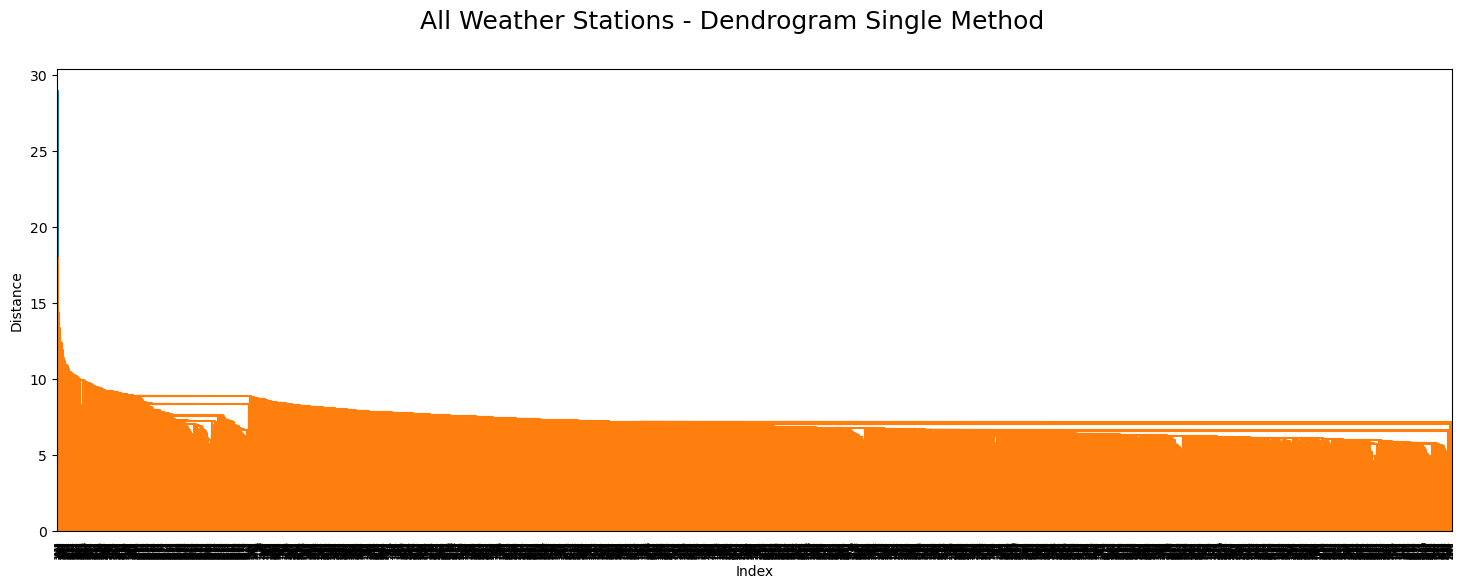

In [13]:
# Perform hierarchical clustering using the single linkage method
distance_single = linkage(features, method="single")

# Plot the dendrogram
plt.figure(figsize=(18, 6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel("Index")
plt.ylabel("Distance")
plt.suptitle("All Weather Stations - Dendrogram Single Method", fontsize=18)
plt.show()

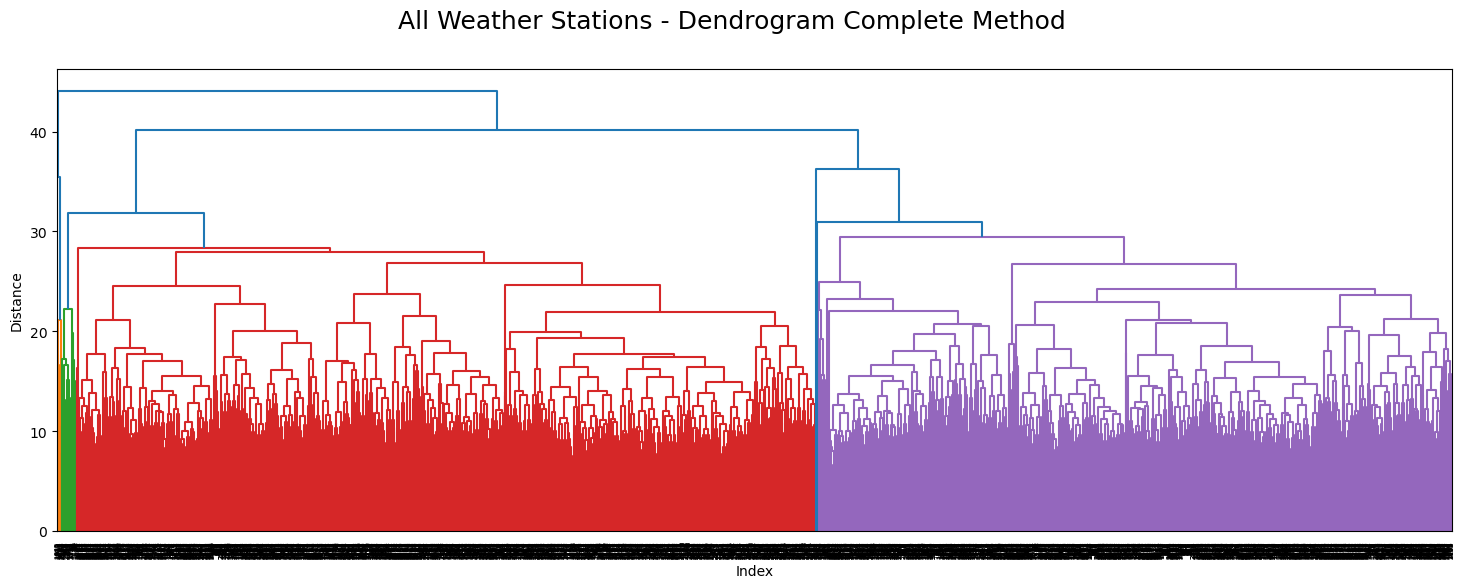

In [14]:
# Perform hierarchical clustering using the complete linkage method
distance_complete = linkage(features, method="complete")

# Plot the dendrogram
plt.figure(figsize=(18, 6))
dendrogram(distance_complete, leaf_rotation=90)
plt.xlabel("Index")
plt.ylabel("Distance")
plt.suptitle("All Weather Stations - Dendrogram Complete Method", fontsize=18)
plt.show()

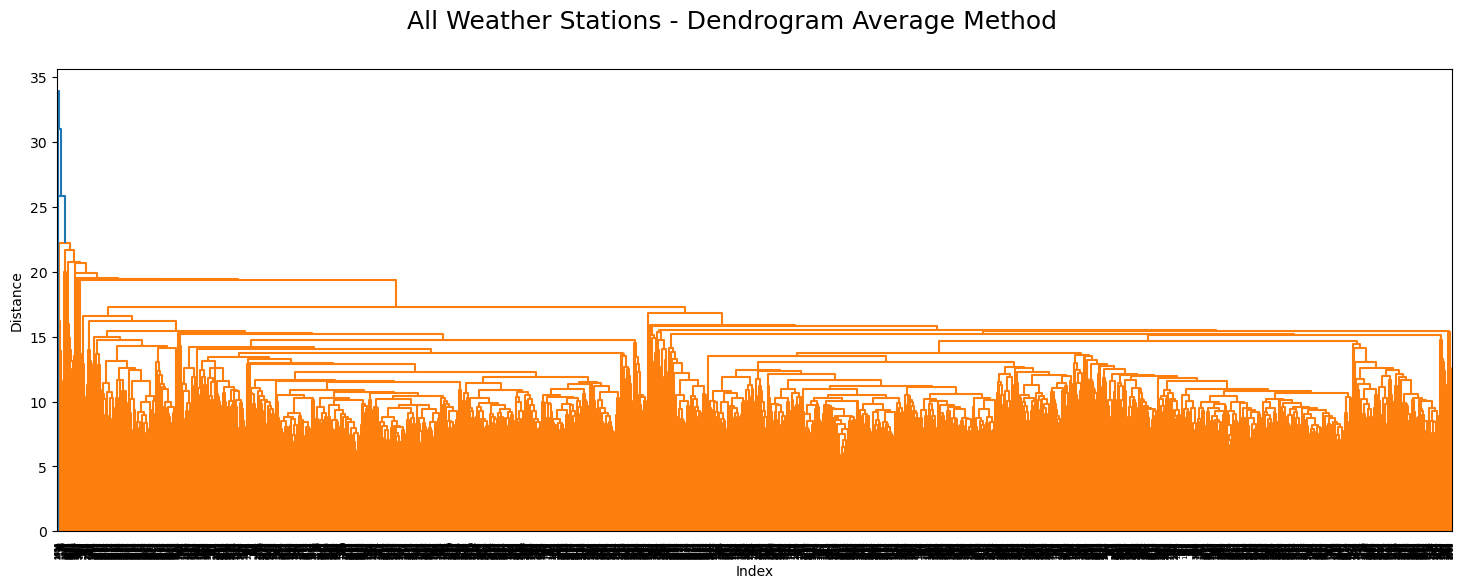

In [15]:
# Perform hierarchical clustering using the average linkage method
distance_average = linkage(features, method="average")

# Plot the dendrogram
plt.figure(figsize=(18, 6))
dendrogram(distance_average, leaf_rotation=90)
plt.xlabel("Index")
plt.ylabel("Distance")
plt.suptitle("All Weather Stations - Dendrogram Average Method", fontsize=18)
plt.show()

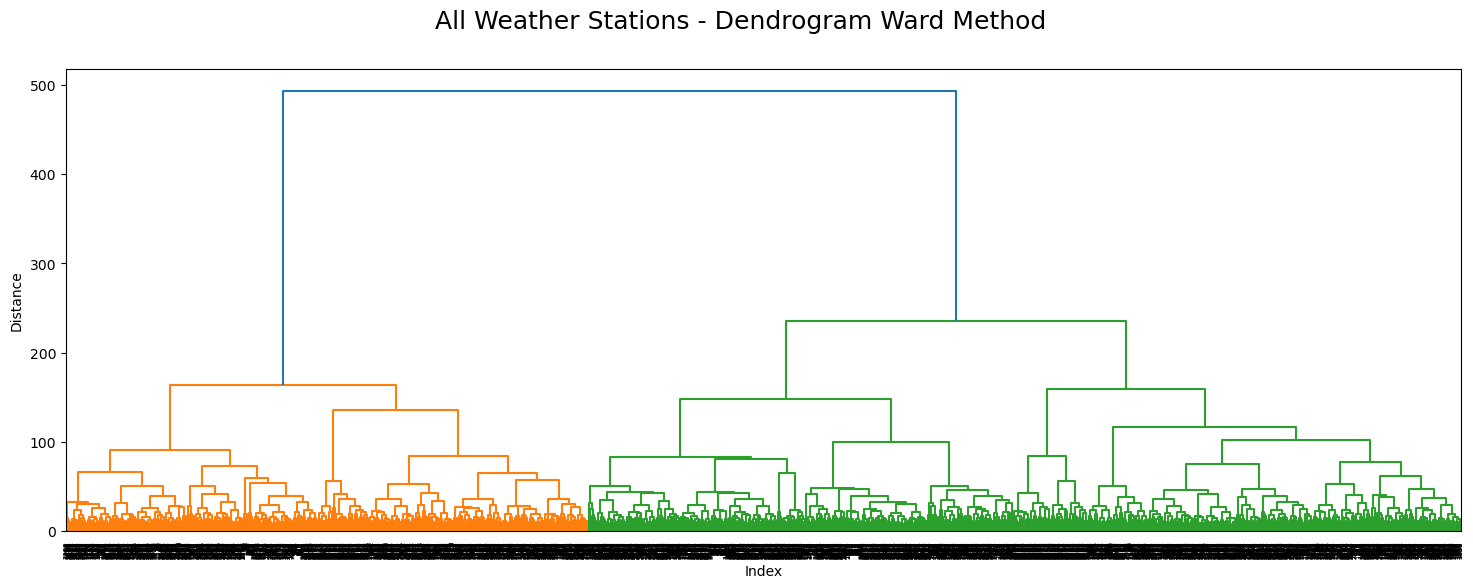

In [16]:
# Perform hierarchical clustering using the ward linkage method
distance_ward = linkage(features, method="ward")

# Plot the dendrogram
plt.figure(figsize=(18, 6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel("Index")
plt.ylabel("Distance")
plt.suptitle("All Weather Stations - Dendrogram Ward Method", fontsize=18)
plt.show()

In [17]:
# Perform PCA to reduce features to 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features)
principalComponents

array([[-6.63185729, -3.93580004],
       [-6.73928085, -2.63400058],
       [-7.07898993, -2.3415823 ],
       ...,
       [ 2.37344094, -0.97422339],
       [ 1.39573295, -0.53763536],
       [-0.30160596, -1.77135676]])

In [18]:
# Make a dataframe of the new components
dfPCA = pd.DataFrame(principalComponents, columns=["PCA1", "PCA2"])
dfPCA

,PCA1,PCA2
0,-6.63,-3.94
1,-6.74,-2.63
2,-7.08,-2.34
3,-7.30,-2.42
4,-8.46,-6.34
...,...,...
3952,2.06,-0.39
3953,2.27,-1.01
3954,2.37,-0.97
3955,1.40,-0.54


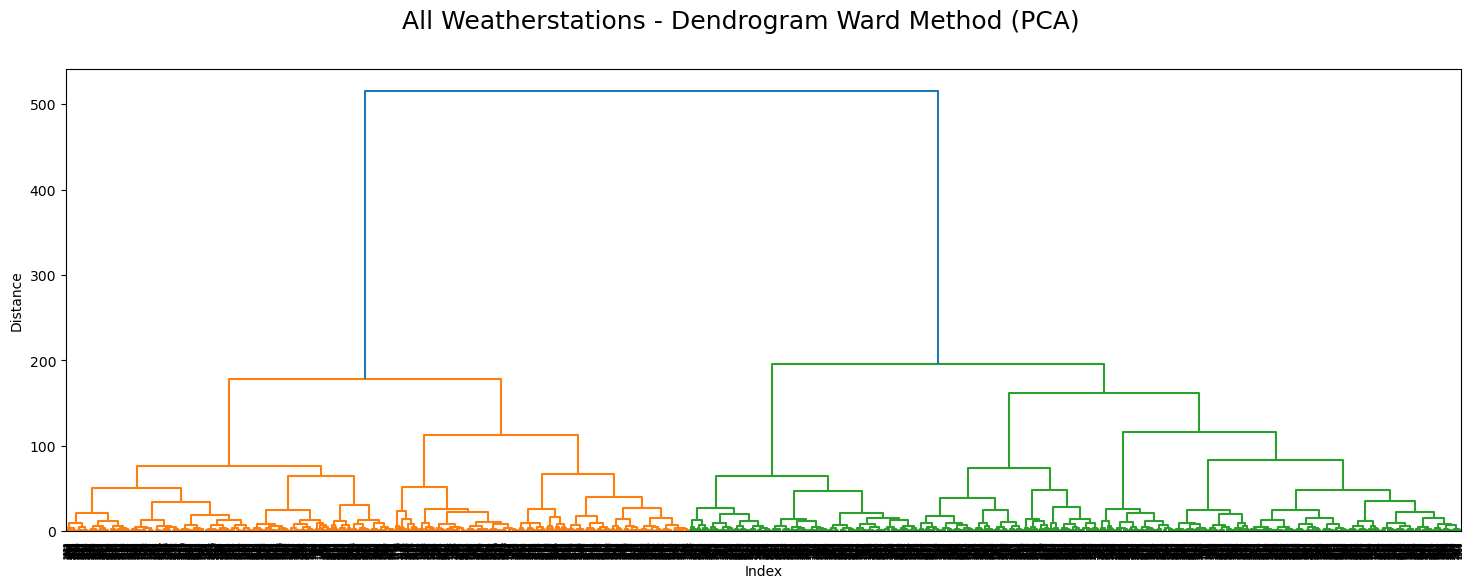

In [19]:
# Perform hierarchical clustering using the ward linkage method on PCA components
distance_ward = linkage(dfPCA, method="ward")

# Plot the dendrogram
plt.figure(figsize=(18, 6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel("Index")
plt.ylabel("Distance")
plt.suptitle("All Weatherstations - Dendrogram Ward Method (PCA)", fontsize=18)

# Specify the path and file name
output_file = r"C:\Users\nvak6\Machine Learning with Python\All Weatherstations - Dendrogram Ward Method (PCA).png"

# Save the plot as a PNG file at the specified location
plt.savefig(output_file)

# Display the plot
plt.show()

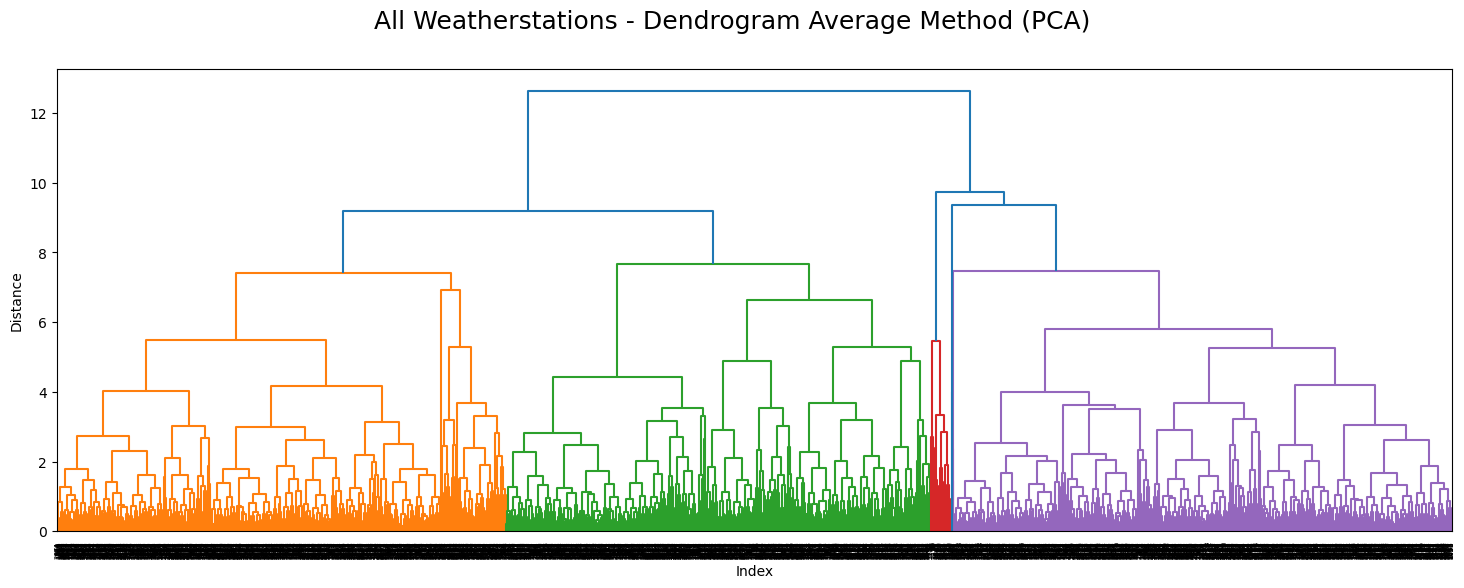

In [20]:
# Perform hierarchical clustering using the average linkage method on PCA components
distance_average_pca = linkage(dfPCA, method="average")

# Plot the dendrogram
plt.figure(figsize=(18, 6))
dendrogram(distance_average_pca, leaf_rotation=90)
plt.xlabel("Index")
plt.ylabel("Distance")
plt.suptitle("All Weatherstations - Dendrogram Average Method (PCA)", fontsize=18)

# Specify the path and file name
output_file = r"C:\Users\nvak6\Machine Learning with Python\All Weatherstations - Dendrogram Average Method (PCA).png"

# Save the plot as a PNG file at the specified location
plt.savefig(output_file)

# Display the plot
plt.show()

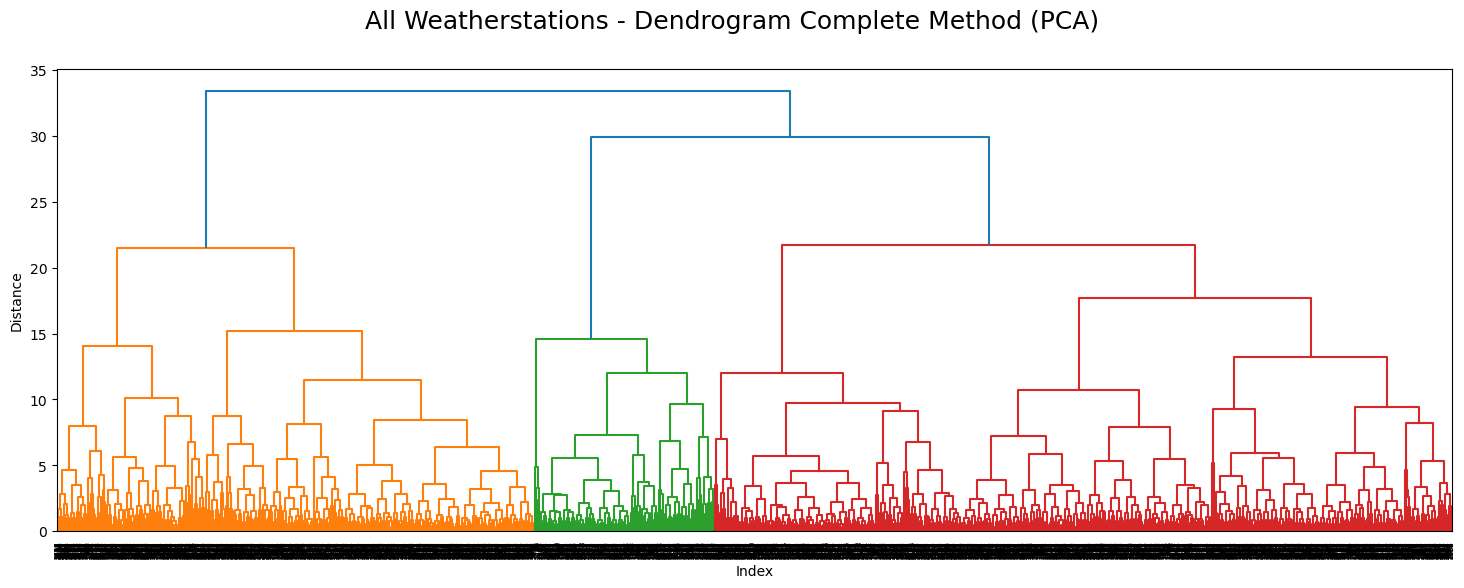

In [21]:
# Perform hierarchical clustering using the complete linkage method on PCA components
distance_complete_pca = linkage(dfPCA, method="complete")

# Plot the dendrogram
plt.figure(figsize=(18, 6))
dendrogram(distance_complete_pca, leaf_rotation=90)
plt.xlabel("Index")
plt.ylabel("Distance")
plt.suptitle("All Weatherstations - Dendrogram Complete Method (PCA)", fontsize=18)

# Specify the path and file name
output_file = r"C:\Users\nvak6\Machine Learning with Python\All Weatherstations - Dendrogram Complete Method (PCA).png"

# Save the plot as a PNG file at the specified location
plt.savefig(output_file)

# Display the plot
plt.show()

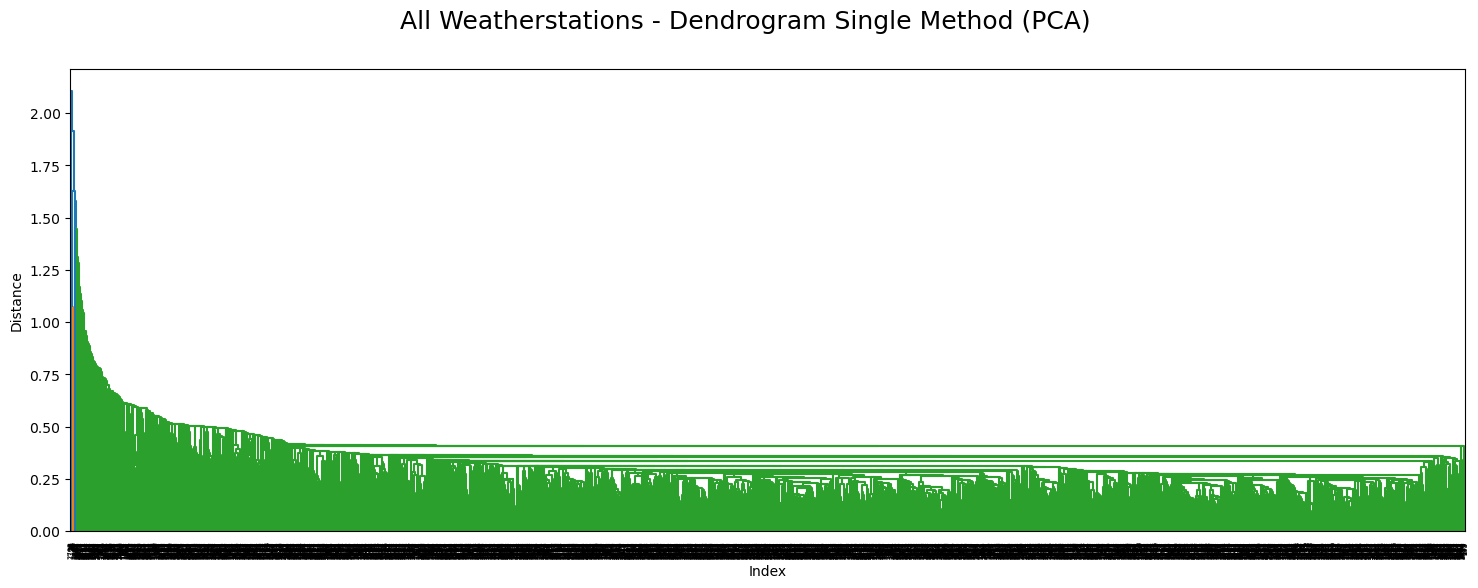

In [22]:

# Perform hierarchical clustering using the single linkage method on PCA components
distance_single_pca = linkage(dfPCA, method="single")

# Plot the dendrogram
plt.figure(figsize=(18, 6))
dendrogram(distance_single_pca, leaf_rotation=90)
plt.xlabel("Index")
plt.ylabel("Distance")
plt.suptitle("All Weatherstations - Dendrogram Single Method (PCA)", fontsize=18)

# Specify the path and file name
output_file = r"C:\Users\nvak6\Machine Learning with Python\All Weatherstations - Dendrogram Single Method (PCA).png"

# Save the plot as a PNG file at the specified location
plt.savefig(output_file)

# Display the plot
plt.show()


In [23]:
dfPCA.to_csv(os.path.join(path,  'all-weather-stations-last-decade-pca.csv'), index=False)